In [144]:
import math
import statistics
import numpy as np
import pandas as pd
import scipy.stats

In [145]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [146]:
print(x, x_with_nan)

[8.0, 1, 2.5, 4, 28.0] [8.0, 1, 2.5, nan, 4, 28.0]


In [147]:
# array 
y, y_with_nan = np.array(x), np.array(x_with_nan)
print(y, y_with_nan)
# series
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(z, z_with_nan)

[ 8.   1.   2.5  4.  28. ] [ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64 0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [148]:
# mean
mean = sum(x) / len(x)
print("normal calculation", mean)

mean = sum(x_with_nan) / len(x_with_nan)
print("normal calculation with nan", mean)

# dengan statistic
mean = statistics.mean(x)
print("mean with statistic", mean)

mean = statistics.mean(x_with_nan)
print("mean with statistic", mean)


normal calculation 8.7
normal calculation with nan nan
mean with statistic 8.7
mean with statistic nan


In [149]:
# array
print("mean array", y.mean())
print("mean array with nan", y_with_nan.mean())

# series
print("mean array", z.mean())
print("mean array with nan", z_with_nan.mean())

mean array 8.7
mean array with nan nan
mean array 8.7
mean array with nan 8.7


In [150]:
# Weighted Mean
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
print("normal wmean", wmean)

normal wmean 6.95


In [151]:
y = np.array(x)
w = np.array(w)
z = pd.Series(x)

# numpy
wmean = np.average(y, weights=w)
print("normal wmean array", wmean)

wmean = np.average(z, weights=w)
print("normal wmean series", wmean)

wmean = (y * w).sum() / w.sum()
print("normal wmean dot", wmean)

normal wmean array 6.95
normal wmean series 6.95
normal wmean dot 6.95


In [152]:
# harmonic mean with statistic
statistics.harmonic_mean(x)

2.7613412228796843

In [153]:
# harmonic mean normal (n / sum(1/xi))
len(x) / sum(1/x_ for x_ in x)

2.7613412228796843

In [154]:
# array harmonic
scipy.stats.hmean(y)

2.7613412228796843

In [155]:
# series harmonic
scipy.stats.hmean(z)

2.7613412228796843

In [156]:
# normal geometric mean
gmean = 1
for x_ in x:
    gmean *= x_
gmean ** (1/len(x))

4.677885674856041

In [157]:
scipy.stats.gmean(x)

4.67788567485604

In [158]:
scipy.stats.gmean(y)

4.67788567485604

In [159]:
scipy.stats.gmean(z)

4.67788567485604

In [160]:
# MEDIAN
median = 0
if len(x) % 2 == 0:
    median = sorted(x)[round(0.5 * (len(x) - 1))]
else:
    mid = round(len(x)/2)
    median = sorted(x)[mid]
print(median)

4


In [161]:
np.median(x_with_nan)

nan

In [162]:
np.median(x)

4.0

In [163]:
np.median(y)

4.0

In [164]:
np.median(z)

4.0

In [165]:
z.median()

4.0

In [166]:
z_with_nan.median()

4.0

In [167]:
x_  = [1,2,3,4]
print(
    statistics.median(x_),
    statistics.median_high(x_),
    statistics.median_low(x_)
)

2.5 3 2


In [168]:
# MODE
u = [2, 3, 2, 8, 12]
max((u.count(item), item) for item in set(u))[1]

2

In [169]:
statistics.mode(u)

2

In [170]:
scipy.stats.mode(u)

ModeResult(mode=2, count=2)

In [171]:
scipy.stats.mode(np.array(u))

ModeResult(mode=2, count=2)

In [172]:
z = pd.Series([1,1,2,2,3,3,4,5,6])
z.mode()

0    1
1    2
2    3
dtype: int64

In [173]:
# variance
mean = sum(x) / len(x)
sum((item - mean) ** 2 for item in x) / (len(x) - 1)

123.2

In [174]:
statistics.variance(x)

123.2

In [175]:
np.var(y, ddof=1)

123.19999999999999

In [176]:
y.var(ddof=1)

123.19999999999999

In [177]:
z = pd.Series(x)
z.var(ddof=1)

123.2

In [178]:
# std
var ** 0.5

11.099549540409287

In [179]:
statistics.stdev(x)

11.099549540409287

In [180]:
np.std(y, ddof=1)

11.099549540409285

In [181]:
z.std(ddof=1)

11.099549540409287

In [182]:
# Skew
z.skew()

1.9470432273905924

In [183]:
z_ = pd.Series([0, 1, 30, 40, 100, 100, 102, 99, 98, 97])
z_.skew()

-0.7275218449350463

In [184]:
# quantiles
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x)

[-0.5, 8.0, 23.4]

In [185]:
statistics.quantiles(x, n=4)

[-0.5, 8.0, 23.4]

In [186]:
# percentile
y = np.array(x)
np.percentile(y, q=5)

-3.44

In [187]:
np.percentile(y, [25, 90, 95, 99])

array([ 0.1  , 28.84 , 34.92 , 39.784])

In [188]:
# Range 
np.ptp(x)

46.0

In [189]:
y.max() - y.min()

46.0

In [190]:
# descriptive statistic
z.describe()


count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64

In [191]:
z

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64

In [192]:
scipy.stats.describe(z, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(1.0, 28.0), mean=8.7, variance=123.19999999999999, skewness=1.9470432273905927, kurtosis=3.878019618875446)

In [193]:
# Measures of Correlation Between Pairs of Data


In [194]:
x = np.array(list(range(-10, 20)))
y = np.random.randint(100, size=30)

In [195]:
x_s = pd.Series(x)
y_s = pd.Series(y)

In [196]:
# covariance 
mean_x = x.mean()
mean_y = y.mean()
cov_xy = sum((x_ - mean_x) * (y_ - mean_y) for (x_, y_) in zip(x, y))/(len(x) - 1)
print(cov_xy)

-60.48275862068966


In [197]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 77.5       , -60.48275862],
       [-60.48275862, 861.84367816]])

In [198]:
std_x = x.std(ddof=1)
std_y = y.std(ddof=1)
cov_xy = cov_mat[0, 1]


In [199]:
r = cov_xy / (std_x * std_y)
r

-0.2340272825275896

In [200]:
scipy.stats.linregress(x, y)

LinregressResult(slope=-0.7804226918798667, intercept=51.64523544679273, rvalue=-0.2340272825275896, pvalue=0.21323224018124076, stderr=0.612707807639059, intercept_stderr=5.977173240147375)

In [201]:
x_s.corr(y_s)

-0.2340272825275896

In [202]:
y_s.corr(x_s)

-0.2340272825275896

In [204]:
# Visualisasi data 
# Box plot
# Histogram
# Pie chart
# Bar chart
# X Y plot
# Heatmap

In [205]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [206]:
np.random.seed(seed=0)
x, y, z = np.random.randn(1000), np.random.randn(100), np.random.randn(10)

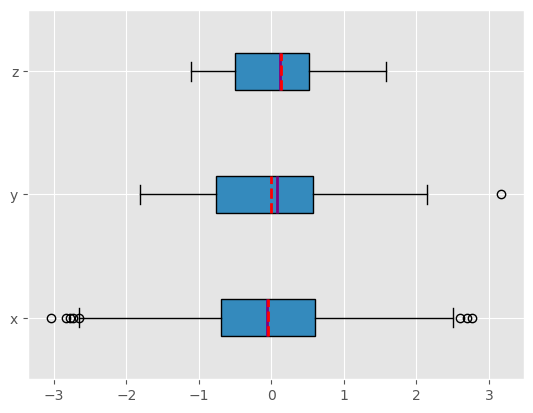

In [211]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), 
           vert=False, 
           showmeans=True, 
           meanline=True, 
           labels=("x","y","z"), 
           patch_artist=True, 
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [219]:
# Histogram 
hist, bin_edges = np.histogram(x, bins=10)
print(hist, bin_edges)

[  9  20  70 146 217 239 160  86  38  15] [-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


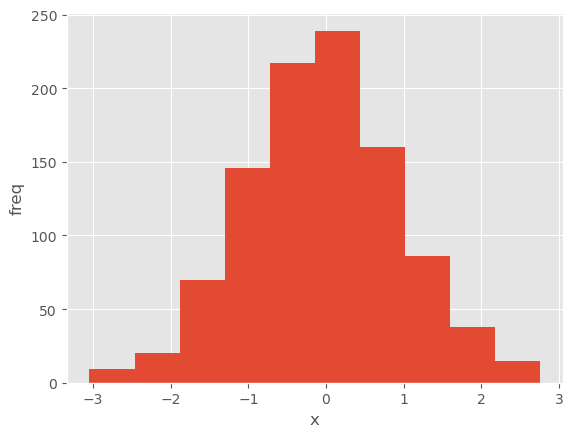

In [229]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel("x")
ax.set_ylabel("freq")
plt.show()

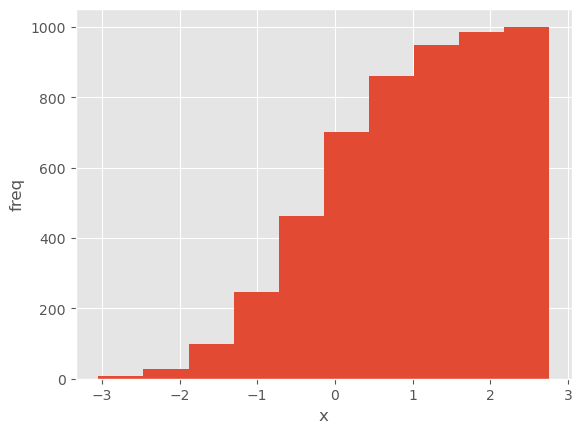

In [230]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel("x")
ax.set_ylabel("freq")
plt.show()

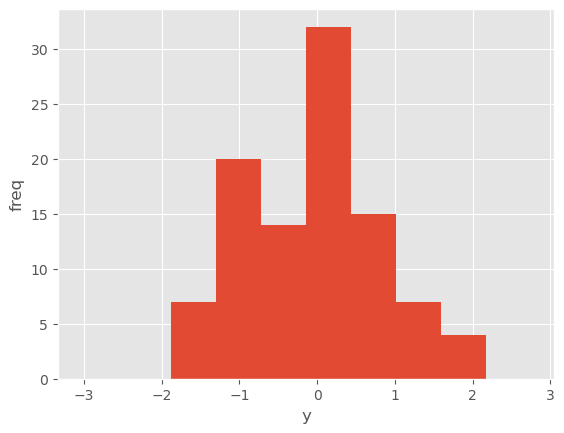

[ 7 15 14 20 23 13  5  2  0  1] [-1.81807763 -1.31917239 -0.82026715 -0.32136191  0.17754333  0.67644857
  1.17535381  1.67425905  2.17316429  2.67206953  3.17097477]


In [227]:
hist, bins = np.histogram(y, bins=10)
fig, ay = plt.subplots()
ay.hist(y, bin_edges, cumulative=False)
ay.set_xlabel("y")
ay.set_ylabel("freq")
plt.show()
print(hist, bins)